<a href="https://colab.research.google.com/github/MachuEngine/python-bigdata-colab-practice/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>#  HW4. 기온데이터 중 1월부터 12월까지 최고 기온을 데이터 상자 그림으로 표현
학번: A70064, 이름: 안종민

In [ ]:
from google.colab import drive
import os
import csv

# 한글 폰트 설치 & 캐시 갱신
# 시스템에 나눔글꼴 설치 (fonts-nanum)
!apt-get install fonts-nanum -qq
# 새로 설치된 폰트를 Matplotlib 등에서 인식하도록 캐시 갱신
!fc-cache -fv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Selecting previously unselected package fonts-nanum.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory det

### 환경 설정 및 한글 폰트 로드

1. **라이브러리 임포트**
- `google.colab.drive`: Colab에서 내 Google Drive를 마운트해 파일에 접근하기 위해 사용
- `os`: 파일 경로를 다루거나 현재 작업 디렉토리를 확인할 때 사용
- `csv`: CSV 형식의 데이터를 읽고 쓸 때 사용

In [ ]:
drive.mount('./gdrive', force_remount=True)
print(os.getcwd())

Mounted at ./gdrive
/content


### Google Drive 마운트
- gdrive로 My Google Drive를 마운트 합니다.

In [ ]:
# [데이터 수집]

f = open('./gdrive/MyDrive/Colab Notebooks/ch4_temperature/temperature.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')

# 헤더 건너 뛰기
header = next(data)  # ['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

# 월별 최고 기온을 담을 list of lists 초기화
monthly_high_temp = [[] for _ in range(12)]

# 데이터 수집 시작
for row in data:
  # 빈 행은 건너뛰기
  if not row:
    continue

  # 컬럼 개수가 기대치(여기선 최소 5개)보다 작으면 건너뛰기
  if len(row) < 5:
    continue

  # 날짜 데이터 -로 split한 후 year, month, day에 각각 저장
  try:
    year, month, day = map(int, row[0].split('-'))
  except (ValueError, AttributeError):
    # row[0]이 "YYYY-MM-DD" 가 아닐 때
    continue

  # list에 월별로 최고기온을 저장
  if 1 <= month <= 12:
    # row[-1]가 빈 문자열인 경우에 대한 예외 처리
    try:
      row[-1] = float(row[-1])
      monthly_high_temp[month - 1].append(row[-1])
    except ValueError:
      continue

# 데이터 수집 종료
f.close()

### 메인 동작

1. **헤더 건너뛰기**
- 첫 줄은 컬럼명만 있고 실제 데이터가 아니므로 `next(data)` 로 스킵

2. **enumerate 사용**
- `start=2`로 설정해, 데이터 첫 행이 원본 CSV의 2번째 줄 번호와 일치하도록 함

3. **빈 행·컬럼 부족 행 스킵**
- `if not row or len(row) < 5: continue` 로 안전하게 처리

4. **list에 월별로 최고 기온 추가**
- `monthly_high_temp를 list of lists형태로 만들고 월별로 최고기온을 저장

6. **파일 핸들 정리**
- `f.close()` 로 파일을 닫아 리소스를 해제

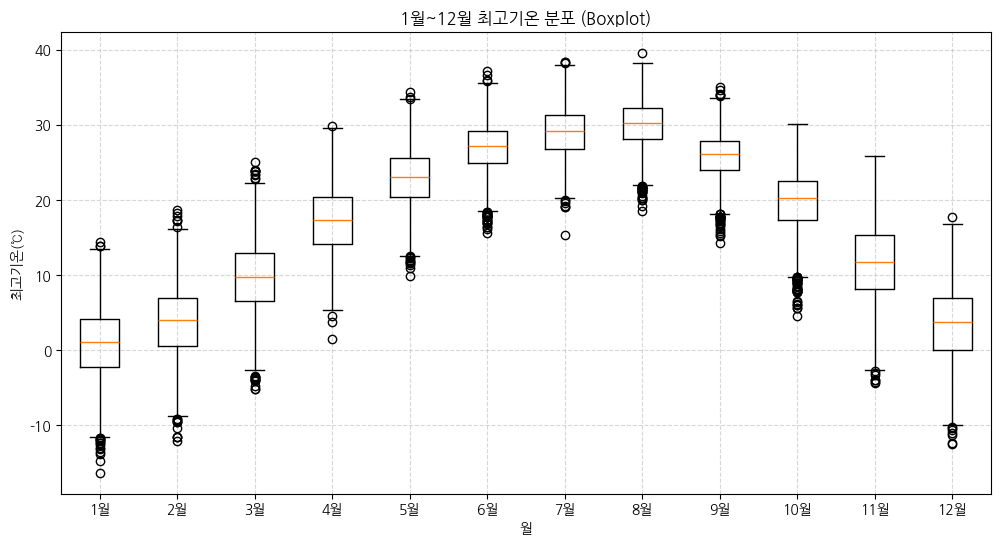

In [ ]:
# [데이터 시각화]

# 폰트 파일 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# 폰트를 Matplotlib 전역에 추가
fm.fontManager.addfont(font_path)
# 폰트 내부 이름 확인 (optional)
font_prop = fm.FontProperties(fname=font_path)
# rcParams 에서 이 이름을 기본 폰트로 설정
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.figure(figsize=(12, 6))
plt.boxplot(monthly_high_temp, showfliers=True)
plt.xticks(range(1, 13), [f'{i}월' for i in range(1, 13)])
plt.title('1월~12월 최고기온 분포 (Boxplot)')
plt.xlabel('월')
plt.ylabel('최고기온(℃)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 결과 출력 - 데이터 시각화

1. 한글 폰트 설정
- `fm.fontManager.addfont()`로 시스템에 설치된 나눔고딕을 `Matplotlib`이 인식하도록 추가
- `plt.rc('font', …)`와 `unicode_minus=False`로 한글 및 마이너스 기호 깨짐 방지

2. 그래프 캔버스 생성
- `plt.figure(figsize=(12,6))`로 출력 크기를 명시적으로 지정하여, 보고서나 발표용에 적합한 비율 유지

3. 상자그림(Boxplot) 호출
- `monthly_high_temp`는 1월부터 12월까지 각 월의 최고기온 리스트가 담긴 중첩 리스트
- `showfliers=True` 옵션으로 통계적인 이상치 데이터를 시각적으로 강조

4. x축 눈금(틱) 커스터마이징
- `plt.xticks()`로 12개 월을 한글 레이블과 함께 매핑

5. 제목·축 레이블
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()`로 그래프의 의미를 명확히 전달

6. 격자선 추가
- 시각적 가독성을 높이기 위해 점선('--') 스타일의 그리드 삽입
